<a href="https://colab.research.google.com/github/DorothyOteng/Intro-to-Python-assignment/blob/main/GSS_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **General Social Survey 2021 (GSS)**


# Outline
1. Proposal- What Impacts People's Sense of Health 
2. What i intend to do- to find the correlation between income, sex, race, age, marital status and one's sense of health.
3. Data source
4. Results/Conclusion
5. References

In [56]:
''' data dictionary 

for race attribute
1.0 = white
2.0 = black
3.0 = other

for sex attribute
1.0 = male
2.0 = female

for marital attribute
1.0 = married
2.0 = widowed
3.0 = divorced
4.0 = separated
5.0 = never married

for health attribute
1.0 = excellent
2.0 = good
3.0 = fair
4.0 = poor

for income attribute
1.0 = under $1000
2.0 = $1,000 to $2,999
3.0 = $3,000 to $3,999
4.0 = $4,000 to $4,999
5.0 = $5,000 to $5,999
6.0 = $6,000 to $6,999
7.0 = $7,000 to $7,999
8.0 = $8,000 to $9,999
9.0 = $10,000 to $14,999
10.0 = $15,000 to $19,999
11.0 = $20,000 to $24,999
12.0 = $25,000 or more

'''

#1 Import required libraries

import pandas as pd
import numpy as np
import scipy.stats as stats

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly

# import the data (THIS IS MY DATA SOURCE)
gss = pd.read_csv('/content/gss2021.csv')

In [57]:
#2 checking the first 5 rows of the dataset
gss.head()

,year,id,wrkslf,wrkgovt,OCC10,PRESTG10,INDUS10,marital,martype,divorce,...,RELITENNV,BIBLENV,POSTLIFENV,KIDSSOLNV,USCITZNNV,FUCITZNNV,FEPOLNV,SCIBNFTSV,ABANYG,fileversion
0,2021.0,1.0,2.0,NaN,5400.0,38.0,7980.0,1.0,NaN,2.0,...,2.0,2.0,2.0,4.0,NaN,NaN,NaN,2.0,2.0,7221.3
1,2021.0,2.0,2.0,NaN,40.0,57.0,7470.0,3.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,7221.3
2,2021.0,3.0,2.0,NaN,7750.0,35.0,4770.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,7221.3
3,2021.0,4.0,1.0,NaN,4600.0,35.0,8470.0,2.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7221.3
4,2021.0,6.0,2.0,NaN,5840.0,38.0,6990.0,5.0,NaN,NaN,...,2.0,2.0,1.0,NaN,1.0,NaN,2.0,NaN,1.0,7221.3


In [58]:
#3 checking the last 5 rows of the data set
gss.tail()

,year,id,wrkslf,wrkgovt,OCC10,PRESTG10,INDUS10,marital,martype,divorce,...,RELITENNV,BIBLENV,POSTLIFENV,KIDSSOLNV,USCITZNNV,FUCITZNNV,FEPOLNV,SCIBNFTSV,ABANYG,fileversion
4027,2021.0,4467.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,2.0,3.0,1.0,NaN,NaN,NaN,2.0,NaN,1.0,7221.3
4028,2021.0,4468.0,2.0,NaN,5240.0,31.0,5590.0,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7221.3
4029,2021.0,4469.0,2.0,NaN,430.0,39.0,2190.0,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,7221.3
4030,2021.0,4470.0,2.0,NaN,2320.0,64.0,7860.0,3.0,NaN,NaN,...,NaN,2.0,1.0,NaN,NaN,NaN,2.0,NaN,1.0,7221.3
4031,2021.0,4471.0,2.0,NaN,8965.0,35.0,3980.0,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,7221.3


In [60]:
#4 to view columns 
gss.columns

Index(['year', 'id', 'wrkslf', 'wrkgovt', 'OCC10', 'PRESTG10', 'INDUS10',
       'marital', 'martype', 'divorce',
       ...
       'RELITENNV', 'BIBLENV', 'POSTLIFENV', 'KIDSSOLNV', 'USCITZNNV',
       'FUCITZNNV', 'FEPOLNV', 'SCIBNFTSV', 'ABANYG', 'fileversion'],
      dtype='object', length=732)

In [61]:
 
#5 this finds information about the dataframe gss
gss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Columns: 732 entries, year to fileversion
dtypes: float64(732)
memory usage: 22.5 MB


In [62]:
#6 this finds the shape of the dataset which tells the number of rows and number of columns
gss.shape

(4032, 732)

In [63]:
#7 checking for null values in the dataset
gss.isnull()



,year,id,wrkslf,wrkgovt,OCC10,PRESTG10,INDUS10,marital,martype,divorce,...,RELITENNV,BIBLENV,POSTLIFENV,KIDSSOLNV,USCITZNNV,FUCITZNNV,FEPOLNV,SCIBNFTSV,ABANYG,fileversion
0,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,True,True,True,False,False,False
1,False,False,False,True,False,False,False,False,True,True,...,False,True,True,True,True,True,True,False,True,False
2,False,False,False,True,False,False,False,False,True,True,...,True,True,True,True,True,True,False,True,False,False
3,False,False,False,True,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,False
4,False,False,False,True,False,False,False,False,True,True,...,False,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,False,False,True,True,True,True,True,False,True,True,...,False,False,False,True,True,True,False,True,False,False
4028,False,False,False,True,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,False
4029,False,False,False,True,False,False,False,False,True,False,...,True,True,True,True,True,True,True,False,True,False
4030,False,False,False,True,False,False,False,False,True,True,...,True,False,False,True,True,True,False,True,False,False


In [64]:
#8 this checks the sum total of all the missing values in the dataset
gss.isnull().sum()

year              0
id                0
wrkslf          107
wrkgovt        4032
OCC10           162
               ... 
FUCITZNNV      3961
FEPOLNV        2702
SCIBNFTSV      2194
ABANYG         2732
fileversion       0
Length: 732, dtype: int64

In [65]:
#9 to check your columns again before dropping them
gss.columns

Index(['year', 'id', 'wrkslf', 'wrkgovt', 'OCC10', 'PRESTG10', 'INDUS10',
       'marital', 'martype', 'divorce',
       ...
       'RELITENNV', 'BIBLENV', 'POSTLIFENV', 'KIDSSOLNV', 'USCITZNNV',
       'FUCITZNNV', 'FEPOLNV', 'SCIBNFTSV', 'ABANYG', 'fileversion'],
      dtype='object', length=732)

In [66]:
#10 this gives you the overall statistics about the dataframe 
gss.describe()

,year,id,wrkslf,wrkgovt,OCC10,PRESTG10,INDUS10,marital,martype,divorce,...,RELITENNV,BIBLENV,POSTLIFENV,KIDSSOLNV,USCITZNNV,FUCITZNNV,FEPOLNV,SCIBNFTSV,ABANYG,fileversion
count,4032.0,4032.000000,3925.000000,0.0,3870.000000,3873.000000,3832.000000,4023.000000,103.000000,2300.000000,...,2486.000000,1935.000000,1921.000000,1263.000000,210.000000,71.000000,1330.000000,1838.000000,1300.000000,4.032000e+03
mean,2021.0,2221.812500,1.889936,NaN,3820.219380,46.544023,6579.415188,2.438479,1.378641,1.736957,...,2.654465,2.093023,1.267569,2.616785,1.338095,2.098592,1.886466,1.447225,1.400769,7.221300e+03
std,0.0,1289.406949,0.313009,NaN,2557.706572,13.811029,2487.112184,1.654712,0.781107,0.440382,...,1.276972,0.719522,0.442807,1.205680,0.474192,0.658026,0.317364,0.561116,0.490243,1.819215e-12
min,2021.0,1.000000,1.000000,NaN,10.000000,16.000000,170.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.221300e+03
25%,2021.0,1105.750000,2.000000,NaN,1920.000000,35.000000,5170.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,7.221300e+03
50%,2021.0,2213.500000,2.000000,NaN,3930.000000,47.000000,7470.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000,7.221300e+03
75%,2021.0,3326.250000,2.000000,NaN,5240.000000,59.000000,8190.000000,4.000000,1.000000,2.000000,...,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,7.221300e+03
max,2021.0,4471.000000,2.000000,NaN,9830.000000,80.000000,9870.000000,5.000000,3.000000,2.000000,...,4.000000,4.000000,2.000000,6.000000,2.000000,3.000000,2.000000,3.000000,2.000000,7.221300e+03


In [67]:
#11 this checks the sum total of all the missing values in the dataset
gss.isnull().sum()

year              0
id                0
wrkslf          107
wrkgovt        4032
OCC10           162
               ... 
FUCITZNNV      3961
FEPOLNV        2702
SCIBNFTSV      2194
ABANYG         2732
fileversion       0
Length: 732, dtype: int64

In [68]:
#12 I created a subset (Here are the variables i would be working with)
cols = ['id','income', 'marital', 'race','sex','age','health']
gss_new = gss[cols]


In [69]:
#13 this is my new dataset i would be working with. Here are the first 5 rows of the dataset.
gss_new.head()

,id,income,marital,race,sex,age,health
0,1.0,NaN,1.0,1.0,2.0,65.0,2.0
1,2.0,12.0,3.0,1.0,1.0,60.0,2.0
2,3.0,NaN,5.0,1.0,NaN,NaN,3.0
3,4.0,NaN,2.0,1.0,NaN,NaN,4.0
4,6.0,NaN,5.0,2.0,2.0,NaN,1.0


In [70]:
#14 Here are the last 5 rows of the dataset.
gss_new.tail()

,id,income,marital,race,sex,age,health
4027,4467.0,8.0,5.0,1.0,2.0,21.0,2.0
4028,4468.0,12.0,1.0,1.0,2.0,29.0,2.0
4029,4469.0,12.0,1.0,3.0,2.0,NaN,3.0
4030,4470.0,2.0,3.0,1.0,2.0,68.0,2.0
4031,4471.0,12.0,1.0,1.0,1.0,48.0,2.0


In [71]:
#15 to view columns of the new dataset
gss_new.columns

Index(['id', 'income', 'marital', 'race', 'sex', 'age', 'health'], dtype='object')

In [72]:
#16 This pulls information about the new dataframe (gss_new) such as number of rows, columns, datatypes etc.
gss_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       4032 non-null   float64
 1   income   3509 non-null   float64
 2   marital  4023 non-null   float64
 3   race     3978 non-null   float64
 4   sex      3940 non-null   float64
 5   age      3699 non-null   float64
 6   health   4023 non-null   float64
dtypes: float64(7)
memory usage: 220.6 KB


In [73]:
#17 this finds the shape of the new dataset which tells the number of rows and number of columns
gss_new.shape

(4032, 7)

In [74]:
#18 it breaks down the shape further here
print('Number of Rows',gss_new.shape[0])
print('Number of Columns',gss_new.shape[1])


Number of Rows 4032
Number of Columns 7


In [75]:
#19 this checks the null values of the new dataset
gss_new.isnull()

,id,income,marital,race,sex,age,health
0,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,True,False,False,True,True,False
3,False,True,False,False,True,True,False
4,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...
4027,False,False,False,False,False,False,False
4028,False,False,False,False,False,False,False
4029,False,False,False,False,False,True,False
4030,False,False,False,False,False,False,False


In [76]:
#20 this checks the sum total of all the missing values in the new dataset
gss_new.isnull().sum()

id           0
income     523
marital      9
race        54
sex         92
age        333
health       9
dtype: int64

In [77]:
#21 this gives you the overall statistics about the new dataframe 
gss_new.describe()

,id,income,marital,race,sex,age,health
count,4032.000000,3509.000000,4023.000000,3978.000000,3940.000000,3699.000000,4023.000000
mean,2221.812500,11.176404,2.438479,1.320010,1.559391,52.164639,2.059657
std,1289.406949,2.226986,1.654712,0.649099,0.496523,17.233333,0.739199
min,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000
25%,1105.750000,12.000000,1.000000,1.000000,1.000000,37.000000,2.000000
50%,2213.500000,12.000000,2.000000,1.000000,2.000000,53.000000,2.000000
75%,3326.250000,12.000000,4.000000,1.000000,2.000000,66.000000,2.000000
max,4471.000000,12.000000,5.000000,3.000000,2.000000,89.000000,4.000000


In [78]:
#22 this removes every row that contained a missing value.
gss_new_drop = gss_new.dropna()
print(gss_new_drop)

          id  income  marital  race  sex   age  health
1        2.0    12.0      3.0   1.0  1.0  60.0     2.0
6        8.0    12.0      5.0   1.0  1.0  20.0     3.0
8       10.0    12.0      1.0   1.0  1.0  76.0     2.0
9       12.0     8.0      3.0   3.0  2.0  61.0     3.0
10      13.0    12.0      1.0   1.0  1.0  37.0     3.0
...      ...     ...      ...   ...  ...   ...     ...
4026  4466.0    12.0      1.0   1.0  2.0  31.0     2.0
4027  4467.0     8.0      5.0   1.0  2.0  21.0     2.0
4028  4468.0    12.0      1.0   1.0  2.0  29.0     2.0
4030  4470.0     2.0      3.0   1.0  2.0  68.0     2.0
4031  4471.0    12.0      1.0   1.0  1.0  48.0     2.0

[3287 rows x 7 columns]


In [79]:
#23 This gives you information about the newest dataframe (gss_new_drop).
gss_new_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3287 entries, 1 to 4031
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3287 non-null   float64
 1   income   3287 non-null   float64
 2   marital  3287 non-null   float64
 3   race     3287 non-null   float64
 4   sex      3287 non-null   float64
 5   age      3287 non-null   float64
 6   health   3287 non-null   float64
dtypes: float64(7)
memory usage: 205.4 KB


In [80]:
#24 this detects the missing values in the newest dataframe.
gss_new_drop.isna()

,id,income,marital,race,sex,age,health
1,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4026,False,False,False,False,False,False,False
4027,False,False,False,False,False,False,False
4028,False,False,False,False,False,False,False
4030,False,False,False,False,False,False,False


In [81]:
#25 this checks the sum total of all the missing values in the newest dataset. Now you can tell there are no missing values since they were dropped. 
gss_new_drop.isna().sum()

id         0
income     0
marital    0
race       0
sex        0
age        0
health     0
dtype: int64

In [82]:
#26 now all the missing values in the rows have been deleted and this is the new dataframe called gss_new-drop. 
gss_new_drop.head()

,id,income,marital,race,sex,age,health
1,2.0,12.0,3.0,1.0,1.0,60.0,2.0
6,8.0,12.0,5.0,1.0,1.0,20.0,3.0
8,10.0,12.0,1.0,1.0,1.0,76.0,2.0
9,12.0,8.0,3.0,3.0,2.0,61.0,3.0
10,13.0,12.0,1.0,1.0,1.0,37.0,3.0


In [83]:
#27 New dataframe we are now working with
gss_new_drop

,id,income,marital,race,sex,age,health
1,2.0,12.0,3.0,1.0,1.0,60.0,2.0
6,8.0,12.0,5.0,1.0,1.0,20.0,3.0
8,10.0,12.0,1.0,1.0,1.0,76.0,2.0
9,12.0,8.0,3.0,3.0,2.0,61.0,3.0
10,13.0,12.0,1.0,1.0,1.0,37.0,3.0
...,...,...,...,...,...,...,...
4026,4466.0,12.0,1.0,1.0,2.0,31.0,2.0
4027,4467.0,8.0,5.0,1.0,2.0,21.0,2.0
4028,4468.0,12.0,1.0,1.0,2.0,29.0,2.0
4030,4470.0,2.0,3.0,1.0,2.0,68.0,2.0


In [84]:
#28. This is the first 5 rows of the newest dataframe
gss_new_drop.head()

,id,income,marital,race,sex,age,health
1,2.0,12.0,3.0,1.0,1.0,60.0,2.0
6,8.0,12.0,5.0,1.0,1.0,20.0,3.0
8,10.0,12.0,1.0,1.0,1.0,76.0,2.0
9,12.0,8.0,3.0,3.0,2.0,61.0,3.0
10,13.0,12.0,1.0,1.0,1.0,37.0,3.0


In [85]:
#29 statistics for 'income'
gss_new_drop.income.describe()

count    3287.000000
mean       11.184667
std         2.217407
min         1.000000
25%        12.000000
50%        12.000000
75%        12.000000
max        12.000000
Name: income, dtype: float64

In [86]:
#30 statistics for 'marital'
gss_new_drop.marital.describe()

count    3287.000000
mean        2.423486
std         1.645972
min         1.000000
25%         1.000000
50%         1.000000
75%         4.000000
max         5.000000
Name: marital, dtype: float64

In [87]:
#31 statistics for 'race'
gss_new_drop.race.describe()

count    3287.000000
mean        1.293581
std         0.623562
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: race, dtype: float64

In [88]:
#32 statistics for 'sex'
gss_new_drop.sex.describe()

count    3287.000000
mean        1.549133
std         0.497656
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: sex, dtype: float64

In [89]:
#33 statistics for 'age'
gss_new_drop.age.describe()

count    3287.000000
mean       52.453301
std        16.988365
min        18.000000
25%        38.000000
50%        53.000000
75%        66.000000
max        89.000000
Name: age, dtype: float64

This means; 


*   25% of 'age' is below 38.
*   50% of 'age' is below 53.
*   75% of 'age' is below 66.


In [90]:
#34 statistics for 'health'
gss_new_drop.health.describe()

count    3287.000000
mean        2.047764
std         0.729665
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: health, dtype: float64

In [91]:
#35 this shows the count of unique values in the 'sex' column. 
gss_new_drop['sex'].value_counts()

2.0    1805
1.0    1482
Name: sex, dtype: int64

This shows the number of times female and male were found in the dataset.

In [92]:
#36 this shows the count of unique values in 'race' column
gss_new_drop['race'].value_counts()

1.0    2620
2.0     369
3.0     298
Name: race, dtype: int64

This shows the number of times the respective race showed in the dataset. Refer to data dictionary above. 

In [93]:
#37 this shows the count of unique values in 'marital' column
gss_new_drop['marital'].value_counts()

1.0    1645
5.0     775
3.0     552
2.0     235
4.0      80
Name: marital, dtype: int64

In [94]:
#38 this shows the count of unique values in 'health' column
gss_new_drop['health'].value_counts()

2.0    1863
1.0     689
3.0     624
4.0     111
Name: health, dtype: int64

In [95]:
#39 this shows the count of unique values in 'income' column
gss_new_drop['income'].value_counts()

12.0    2636
9.0      158
11.0     137
10.0     131
1.0       60
8.0       50
2.0       47
3.0       17
7.0       16
5.0       14
6.0       11
4.0       10
Name: income, dtype: int64

If you refer to the data dictionary above, this shows that those who's income were 12.0 which represents $25,0000 and above were the most. 

In [96]:
#40 this is sorting "age" in ascending order
gss_new_drop.sort_values(by='age')

,id,income,marital,race,sex,age,health
398,440.0,12.0,5.0,2.0,1.0,18.0,1.0
3129,3453.0,12.0,5.0,1.0,2.0,18.0,2.0
938,1030.0,12.0,5.0,3.0,1.0,19.0,2.0
3015,3317.0,12.0,5.0,1.0,1.0,19.0,2.0
3136,3462.0,12.0,5.0,1.0,2.0,19.0,1.0
...,...,...,...,...,...,...,...
1582,1732.0,10.0,2.0,1.0,2.0,89.0,3.0
1707,1871.0,12.0,2.0,1.0,2.0,89.0,1.0
1530,1673.0,12.0,2.0,1.0,1.0,89.0,2.0
871,950.0,12.0,2.0,1.0,1.0,89.0,2.0


In [97]:
#41 Trying to find which group of people makes the highest income
gss_new_drop.groupby('income').mean()

,id,marital,race,sex,age,health
income,,,,,,
1.0,2509.450000,3.750000,1.616667,1.583333,46.750000,2.250000
2.0,2522.191489,3.553191,1.574468,1.787234,45.638298,2.319149
3.0,1894.058824,3.529412,1.647059,1.764706,52.352941,2.235294
4.0,2094.700000,2.600000,1.300000,1.700000,45.800000,2.500000
5.0,2478.857143,3.785714,1.214286,1.714286,39.071429,2.214286
6.0,2074.090909,3.181818,1.636364,1.636364,42.000000,2.181818
7.0,2101.875000,2.812500,1.312500,1.812500,53.312500,2.687500
8.0,2108.520000,3.520000,1.440000,1.720000,51.600000,2.780000
9.0,2106.037975,3.310127,1.310127,1.639241,52.974684,2.500000


In [98]:
#42 you sort in ascending order to find the minimum income based on sex and race. 
gss_new_drop.groupby(['sex', 'race'])['income'].min().sort_values()

sex  race
1.0  1.0     1.0
     2.0     1.0
     3.0     1.0
2.0  1.0     1.0
     2.0     1.0
     3.0     1.0
Name: income, dtype: float64

In [99]:
#43 you sort in ascending order to find the maximun income based on sex and race
gss_new_drop.groupby(['sex', 'race'])['income'].max().sort_values()

sex  race
1.0  1.0     12.0
     2.0     12.0
     3.0     12.0
2.0  1.0     12.0
     2.0     12.0
     3.0     12.0
Name: income, dtype: float64

In [100]:
#44 you sort in descending order to find the highest income per race
gss_new_drop.groupby(['race', 'sex', 'marital', 'age', 'health'])['income'].mean().sort_values(ascending=False)

race  sex  marital  age   health
1.0   1.0  1.0      22.0  2.0       12.0
      2.0  4.0      35.0  3.0       12.0
           5.0      52.0  1.0       12.0
                    51.0  2.0       12.0
                    50.0  2.0       12.0
                                    ... 
3.0   1.0  5.0      19.0  1.0        1.0
      2.0  5.0      28.0  1.0        1.0
      1.0  5.0      21.0  1.0        1.0
1.0   1.0  5.0      31.0  3.0        1.0
      2.0  1.0      49.0  3.0        1.0
Name: income, Length: 1530, dtype: float64

**RESULTS:**

Note that race, sex, marital, age, health and income attributes does affect one's sense of health.
According to the results above, one can tell that white married males which good health at the age of 22 makes the most income according to this data. 

Secondly, white females at the age of 35 who are separated with fair health also makes as good income as white males. 

The least people on this data are black females with fair health who are married but at around the age of 49 makes the least income which is $1,000 or less. 

I conclude by saying that the African American race are less priviledged in general which includes income, health etc. Hence, race, sex, income, health and age does matter when it comes to people's sense of health. 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


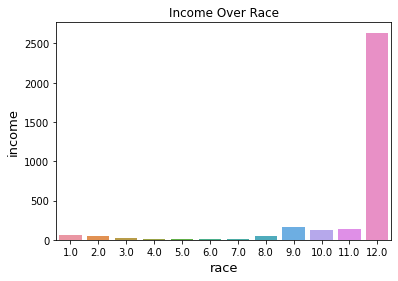

In [102]:
#45 Using seaborn to visualize my data
sns.countplot(gss_new_drop['income'])
plt.title("Income Over Race")
plt.xlabel("race",fontsize=13)
plt.ylabel("income",fontsize=13)
plt.show()

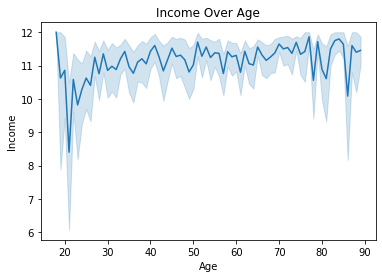

In [103]:
#46 Using line plot to visualize my data
sns.lineplot(x="age", y="income", data=gss_new_drop)
plt.title("Income Over Age")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

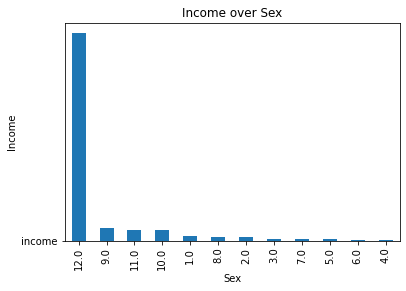

In [104]:
#47 Using bar plot to visualize my data
gss_new_drop.income.value_counts().plot.bar()
plt.bar('sex', 'income')
plt.title("Income over Sex")
plt.xlabel("Sex")
plt.ylabel("Income")
plt.show()

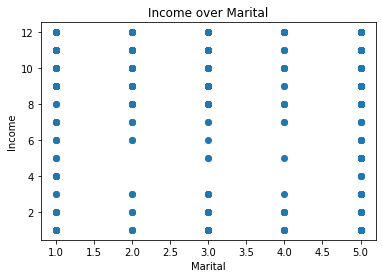

In [51]:
# 48 Using scatter plot to visualize my data
plt.scatter(x=gss_new_drop['marital'],y=gss_new_drop['income'])
plt.title('Income over Marital')
plt.xlabel('Marital')
plt.ylabel('Income')
plt.show()

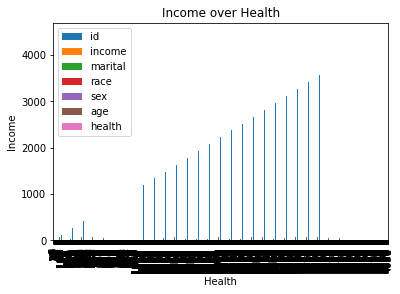

In [55]:
#49 
gss_new_drop.plot.bar()
plt.title('Income over Health')
plt.xlabel('Health')
plt.ylabel('Income')
plt.show()

# Citation

Access and Analyze GSS Data. (2020). GSS Data Explorer. Retrieved December 17, 2022, from https://gssdataexplorer.norc.org/home

/content/gss2021.csv